In [92]:
import pandas.core.describe
%matplotlib inline

import os
import re

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import nltk
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud

[nltk_data] Downloading package omw-1.4 to /home/filip/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [93]:
df = pd.read_csv('./data/tweets.csv')
df.head()

,author_id,author_name,date,emails,hashtags,language,likes,location,mentions,quotes,retweets,sentiment,source,text,time
0,@Acutoronto,Acutoronto,"Mar 27, 2022",NaN,"motivation,acutoronto,acupuncture,tcm,fertilit...",en,0,NaN,NaN,0.0,0.0,positive,LaterMedia,Sunday #motivation. \n\n#acutoronto #acupunctu...,3:05 PM
1,@LorraineZiff,Lorraine Ziff,"Mar 26, 2022",NaN,"lorraineziff,dearlorraine,smile,friendship,lua...",en,5,NaN,larryziff,0.0,2.0,positive,Twitter for iPhone,Luau Ready! 😎💕 #lorraineziff #dearlorraine @la...,3:19 AM
2,@ImpactWellness,Chris Caito,"Mar 27, 2022",NaN,"MuhammadAli,john316,isaiah4031,philippians413,...",en,0,NaN,NaN,0.0,0.0,positive,Twitter for Android,"“I hated every minute of training, but I said,...",3:02 PM
3,@hiromiyoshihair,Hiro Miyoshi,"Mar 27, 2022",NaN,"mothersday,grateful,thankful",en,0,"London, England",NaN,0.0,0.0,positive,"London, England",To all the mothers - we are greateful! Wishing...,12:55 PM
4,@lunaxbrightwin,Liz lvs Joy,"Mar 27, 2022",NaN,"WildsideOutNow,JOY,RedVelvet",en,6,NaN,RVsmtown0,0.0,0.0,positive,Twitter for Android,"JOY, ERES LA MUJER MÁS TALENTOSA QUE EXISTE 😭\...",3:16 PM


In [94]:
df.shape

(5239, 15)

In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
emails,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quotes,4287.0,0.047352,0.650817,0.0,0.0,0.0,0.0,22.0
retweets,4287.0,0.738978,6.043413,0.0,0.0,0.0,0.0,275.0


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5239 entries, 0 to 5238
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   author_id    5229 non-null   object 
 1   author_name  5229 non-null   object 
 2   date         4287 non-null   object 
 3   emails       0 non-null      float64
 4   hashtags     4228 non-null   object 
 5   language     4284 non-null   object 
 6   likes        4287 non-null   object 
 7   location     154 non-null    object 
 8   mentions     1075 non-null   object 
 9   quotes       4287 non-null   float64
 10  retweets     4287 non-null   float64
 11  sentiment    4284 non-null   object 
 12  source       4287 non-null   object 
 13  text         4287 non-null   object 
 14  time         4287 non-null   object 
dtypes: float64(3), object(12)
memory usage: 614.1+ KB


In [97]:
# Remove rows without sentiment
df = df.dropna(subset=['sentiment'])
df = df.reset_index(drop=True)
df

,author_id,author_name,date,emails,hashtags,language,likes,location,mentions,quotes,retweets,sentiment,source,text,time
0,@Acutoronto,Acutoronto,"Mar 27, 2022",NaN,"motivation,acutoronto,acupuncture,tcm,fertilit...",en,0,NaN,NaN,0.0,0.0,positive,LaterMedia,Sunday #motivation. \n\n#acutoronto #acupunctu...,3:05 PM
1,@LorraineZiff,Lorraine Ziff,"Mar 26, 2022",NaN,"lorraineziff,dearlorraine,smile,friendship,lua...",en,5,NaN,larryziff,0.0,2.0,positive,Twitter for iPhone,Luau Ready! 😎💕 #lorraineziff #dearlorraine @la...,3:19 AM
2,@ImpactWellness,Chris Caito,"Mar 27, 2022",NaN,"MuhammadAli,john316,isaiah4031,philippians413,...",en,0,NaN,NaN,0.0,0.0,positive,Twitter for Android,"“I hated every minute of training, but I said,...",3:02 PM
3,@hiromiyoshihair,Hiro Miyoshi,"Mar 27, 2022",NaN,"mothersday,grateful,thankful",en,0,"London, England",NaN,0.0,0.0,positive,"London, England",To all the mothers - we are greateful! Wishing...,12:55 PM
4,@lunaxbrightwin,Liz lvs Joy,"Mar 27, 2022",NaN,"WildsideOutNow,JOY,RedVelvet",en,6,NaN,RVsmtown0,0.0,0.0,positive,Twitter for Android,"JOY, ERES LA MUJER MÁS TALENTOSA QUE EXISTE 😭\...",3:16 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,@miss_andin0,Srta. Andino,"Mar 27, 2022",NaN,"sad,balebergalabida",es,20,NaN,NaN,0.0,0.0,negative,Twitter for iPhone,"Acabo de echar gasolina a $1.21 y, nuevamente,...",1:25 AM
4280,@PokeGuyPodcast,PokeGuyChris,"Mar 24, 2022",NaN,"Niantic,disappointed",en,2,NaN,NaN,0.0,0.0,negative,Twitter for iPhone,Ooohhh #Niantic you are try so hard to revert ...,12:40 AM
4281,@larahord,Larawr,"Mar 23, 2022",NaN,disappointed,tl,0,NaN,"PLDTEnterprise,PLDTEnt_Cares,PLDT_Cares",0.0,0.0,negative,Twitter for Android,"@PLDTEnterprise @PLDTEnt_Cares @PLDT_Cares, 1 ...",1:03 AM
4282,@jamieswolfhowl,Jam !!,"Mar 25, 2022",NaN,NaN,en,3,NaN,"spammingbuttons,PrettyVixen__",0.0,0.0,negative,Twitter for iPhone,@spammingbuttons cant be me bc u refuse to imp...,5:18 AM


In [98]:
# Remove rows if language is not english
df = df[df['language'].isin(['en'])]
df = df.reset_index(drop=True)
df

,author_id,author_name,date,emails,hashtags,language,likes,location,mentions,quotes,retweets,sentiment,source,text,time
0,@Acutoronto,Acutoronto,"Mar 27, 2022",NaN,"motivation,acutoronto,acupuncture,tcm,fertilit...",en,0,NaN,NaN,0.0,0.0,positive,LaterMedia,Sunday #motivation. \n\n#acutoronto #acupunctu...,3:05 PM
1,@LorraineZiff,Lorraine Ziff,"Mar 26, 2022",NaN,"lorraineziff,dearlorraine,smile,friendship,lua...",en,5,NaN,larryziff,0.0,2.0,positive,Twitter for iPhone,Luau Ready! 😎💕 #lorraineziff #dearlorraine @la...,3:19 AM
2,@ImpactWellness,Chris Caito,"Mar 27, 2022",NaN,"MuhammadAli,john316,isaiah4031,philippians413,...",en,0,NaN,NaN,0.0,0.0,positive,Twitter for Android,"“I hated every minute of training, but I said,...",3:02 PM
3,@hiromiyoshihair,Hiro Miyoshi,"Mar 27, 2022",NaN,"mothersday,grateful,thankful",en,0,"London, England",NaN,0.0,0.0,positive,"London, England",To all the mothers - we are greateful! Wishing...,12:55 PM
4,@lunaxbrightwin,Liz lvs Joy,"Mar 27, 2022",NaN,"WildsideOutNow,JOY,RedVelvet",en,6,NaN,RVsmtown0,0.0,0.0,positive,Twitter for Android,"JOY, ERES LA MUJER MÁS TALENTOSA QUE EXISTE 😭\...",3:16 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3377,@lisa_m_kay,Lisa Kay,"Mar 26, 2022",NaN,devastatedQuote,en,0,NaN,NaN,0.0,0.0,negative,Twitter for Android,I can't even right now. My prayers go out to ...,3:08 PM
3378,@MALC0M_HEX,MALC0M_HEX,"Mar 27, 2022",NaN,"PissedAtAJ,gabagoo,2episodesleft,sad",en,0,NaN,NaN,0.0,0.0,negative,Twitter for Android,I would SPOOOOOGE so HARD for a little taste o...,6:30 AM
3379,@PokeGuyPodcast,PokeGuyChris,"Mar 24, 2022",NaN,"Niantic,disappointed",en,2,NaN,NaN,0.0,0.0,negative,Twitter for iPhone,Ooohhh #Niantic you are try so hard to revert ...,12:40 AM
3380,@jamieswolfhowl,Jam !!,"Mar 25, 2022",NaN,NaN,en,3,NaN,"spammingbuttons,PrettyVixen__",0.0,0.0,negative,Twitter for iPhone,@spammingbuttons cant be me bc u refuse to imp...,5:18 AM


In [99]:
# Check number of rows for each sentiment
df['sentiment'].value_counts()

neutral     1356
positive    1073
negative     953
Name: sentiment, dtype: int64

[Text(0, 0, 'Negative'), Text(1, 0, 'Neutral'), Text(2, 0, 'Positive')]

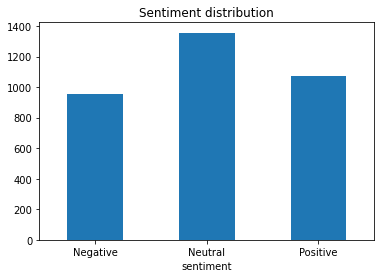

In [100]:
# Display sentiment data distribution
sentiment_text_df = df[['sentiment', 'text']]
ax = sentiment_text_df.groupby('sentiment').count().plot(kind='bar', title='Sentiment distribution', legend=False)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'], rotation=0)

In [101]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

stop_words = stopwords.words('english')
word_lemmatizer = WordNetLemmatizer()
tweet_tokenizer = TweetTokenizer(reduce_len=True)

EMAIL_PATTERN = re.compile(
    r'(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)'
)

MENTION_PATTERN = re.compile(r'(^|[^@\w])@(\w{1,15})\b')

HASHTAG_PATTERN = re.compile(r'(^|[^@\w])#(\w{1,15})\b')

URL_PATTERN = re.compile(r'((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)')

NON_ALPHA_PATTERN = re.compile('[^a-zA-Z0-9]')

SEQUENCE_PATTERN = re.compile(r'(.)\1\1+')

SEQUENCE_REPLACE_PATTERN = r'\1\1'


def replace_emails(text):
    return re.sub(EMAIL_PATTERN, ' email', text)


def replace_mentions(text):
    return re.sub(MENTION_PATTERN, ' mention', text)


def replace_hashtags(text):
    return re.sub(HASHTAG_PATTERN, ' hashtag', text)


def replace_urls(text):
    return re.sub(URL_PATTERN, ' URL', text)


def replace_non_alphas(text):
    return re.sub(NON_ALPHA_PATTERN, ' ', text)


def replace_sequences(text):
    return re.sub(SEQUENCE_PATTERN, SEQUENCE_REPLACE_PATTERN, text)


def replace_stop_words(text):
    words = ''
    
    for word in tweet_tokenizer.tokenize(text):
        should_include = True
        for stop_word in stop_words:
            if word in stop_words or not len(word):
                should_include = False
                
        if should_include:
            word = word_lemmatizer.lemmatize(word)
            words += f'{word} '
                
    return words

def count_all_caps(text: str):
    return sum(map(str.isupper, text.split()))

def count_excl_marks(text: str):
    return text.count('!')

def count_words(text: str):
    return len(text.split())

def count_urls(text: str):
    return text.count('URL')

def count_mentions(text: str):
    return text.count('mention')

def count_hashtags(text: str):
    return text.count('hashtag')

def get_text_semantic(text: str):
    return text.replace('email', '').replace('mention', '').replace('hashtag', '').replace('URL', '')

def count_nouns(text: str):
    return sum(1 for word, pos in nltk.pos_tag(text.split()) if pos.startswith('NN'))

def count_verbs(text: str):
    return sum(1 for word, pos in nltk.pos_tag(text.split()) if pos.startswith('VB'))

def count_adjectives(text: str):
    return sum(1 for word, pos in nltk.pos_tag(text.split()) if pos.startswith('JJ'))

def use_single_spaces(text: str):
    return ' '.join(text.split())

def fix_comma_separated_ints(number: str):
    return int(number.replace(',', ''))



df['n_all_caps'] = df['text'].map(lambda text: count_all_caps(text))
df['n_excl_marks'] = df['text'].map(lambda text: count_excl_marks(text))
df['text'] = df['text'].map(lambda text: text.lower())
df['text'] = df['text'].map(lambda text: replace_emails(text))
df['text'] = df['text'].map(lambda text: replace_mentions(text))
df['text'] = df['text'].map(lambda text: replace_hashtags(text))
df['text'] = df['text'].map(lambda text: replace_urls(text))
df['text'] = df['text'].map(lambda text: replace_non_alphas(text))
df['text'] = df['text'].map(lambda text: replace_sequences(text))
df['text'] = df['text'].map(lambda text: replace_stop_words(text))
df['n_words'] = df['text'].map(lambda text: count_words(text))
df['n_urls'] = df['text'].map(lambda text: count_urls(text))
df['n_mentions'] = df['text'].map(lambda text: count_mentions(text))
df['n_hashtags'] = df['text'].map(lambda text: count_hashtags(text))
df['text_semantic'] = df['text'].map(lambda text: get_text_semantic(text))
df['n_nouns'] = df['text'].map(lambda text: count_nouns(text))
df['n_verbs'] = df['text'].map(lambda text: count_verbs(text))
df['n_adjectives'] = df['text'].map(lambda text: count_adjectives(text))
df['text'] = df['text'].map(lambda text: use_single_spaces(text))
df['text_semantic'] = df['text_semantic'].map(lambda text: use_single_spaces(text))

df['emails'] = df['emails'].fillna(0)
df['quotes'] = df['quotes'].fillna(0)
df['retweets'] = df['retweets'].fillna(0)
df['likes'] = df['likes'].fillna(0)
df['likes'] = df['likes'].map(lambda number: fix_comma_separated_ints(number))

df.head()

[nltk_data] Downloading package stopwords to /home/filip/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/filip/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/filip/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,author_id,author_name,date,emails,hashtags,language,likes,location,mentions,quotes,...,n_all_caps,n_excl_marks,n_words,n_urls,n_mentions,n_hashtags,text_semantic,n_nouns,n_verbs,n_adjectives
0,@Acutoronto,Acutoronto,"Mar 27, 2022",0.0,"motivation,acutoronto,acupuncture,tcm,fertilit...",en,0,NaN,NaN,0.0,...,0,0,22,0,0,19,sunday inspirationalquotes reproductivehealth,19,1,2
1,@LorraineZiff,Lorraine Ziff,"Mar 26, 2022",0.0,"lorraineziff,dearlorraine,smile,friendship,lua...",en,5,NaN,larryziff,0.0,...,0,1,24,1,1,18,luau ready marinemax sarasota,22,0,2
2,@ImpactWellness,Chris Caito,"Mar 27, 2022",0.0,"MuhammadAli,john316,isaiah4031,philippians413,...",en,0,NaN,NaN,0.0,...,2,0,24,0,0,11,hated every minute training said quit suffer l...,19,3,1
3,@hiromiyoshihair,Hiro Miyoshi,"Mar 27, 2022",0.0,"mothersday,grateful,thankful",en,0,"London, England",NaN,0.0,...,1,1,18,0,0,3,mother greateful wishing happiest day hiromiyo...,12,2,3
4,@lunaxbrightwin,Liz lvs Joy,"Mar 27, 2022",0.0,"WildsideOutNow,JOY,RedVelvet",en,6,NaN,RVsmtown0,0.0,...,14,0,19,0,1,3,joy eres la mujer talentosa que existe red vel...,12,1,3


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3382 entries, 0 to 3381
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   author_id      3382 non-null   object 
 1   author_name    3382 non-null   object 
 2   date           3382 non-null   object 
 3   emails         3382 non-null   float64
 4   hashtags       3332 non-null   object 
 5   language       3382 non-null   object 
 6   likes          3382 non-null   int64  
 7   location       133 non-null    object 
 8   mentions       907 non-null    object 
 9   quotes         3382 non-null   float64
 10  retweets       3382 non-null   float64
 11  sentiment      3382 non-null   object 
 12  source         3382 non-null   object 
 13  text           3382 non-null   object 
 14  time           3382 non-null   object 
 15  n_all_caps     3382 non-null   int64  
 16  n_excl_marks   3382 non-null   int64  
 17  n_words        3382 non-null   int64  
 18  n_urls  

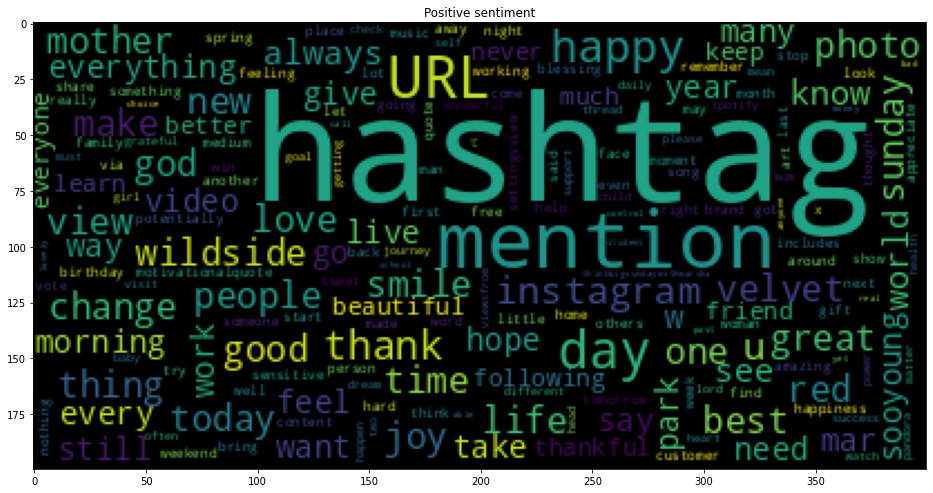

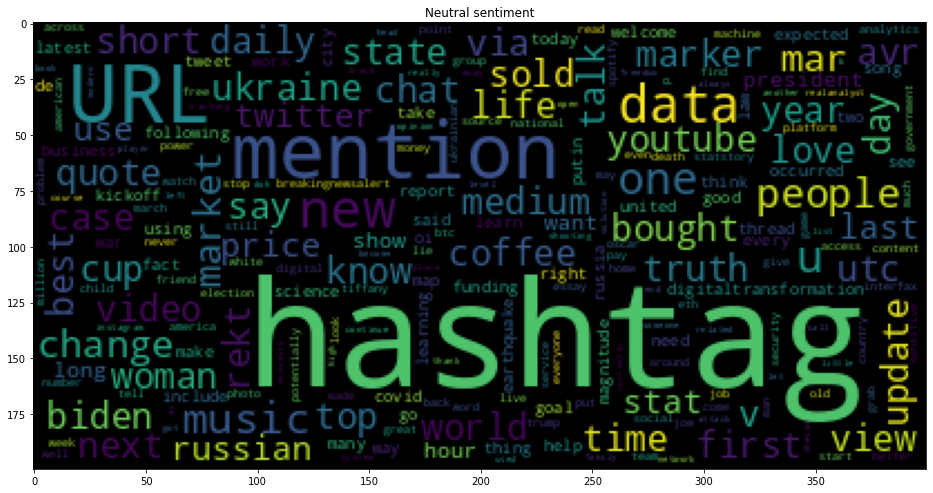

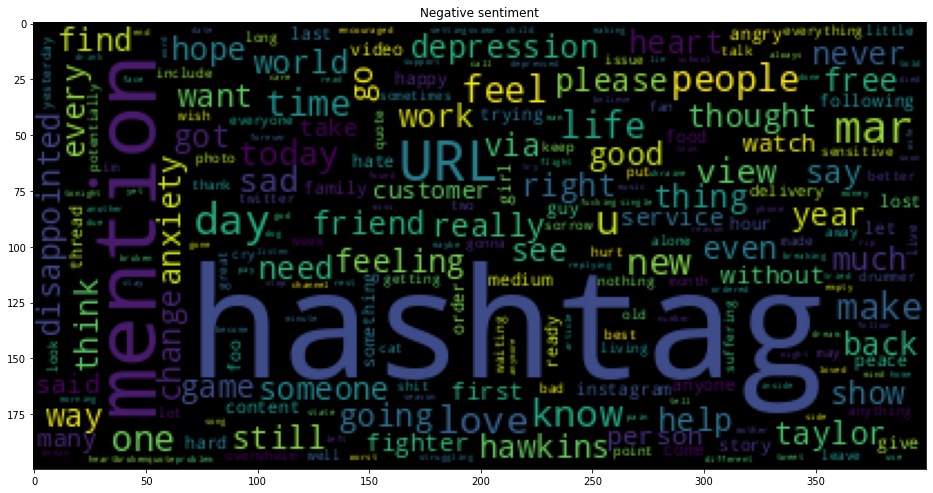

In [103]:
df_positive_text = ' '.join(df.query('sentiment==\'positive\'')['text'])
df_negative_text = ' '.join(df.query('sentiment==\'negative\'')['text'])
df_neutral_text = ' '.join(df.query('sentiment==\'neutral\'')['text'])

def print_word_cloud(title, text):
    plt.figure(figsize=(16, 16))
    wc = WordCloud(max_words=1000, collocations=False).generate(text)
    plt.title(title)
    plt.imshow(wc)
    
# Display word clouds
print_word_cloud('Positive sentiment', df_positive_text)
print_word_cloud('Neutral sentiment', df_neutral_text)
print_word_cloud('Negative sentiment', df_negative_text)

In [104]:
df.head()

,author_id,author_name,date,emails,hashtags,language,likes,location,mentions,quotes,...,n_all_caps,n_excl_marks,n_words,n_urls,n_mentions,n_hashtags,text_semantic,n_nouns,n_verbs,n_adjectives
0,@Acutoronto,Acutoronto,"Mar 27, 2022",0.0,"motivation,acutoronto,acupuncture,tcm,fertilit...",en,0,NaN,NaN,0.0,...,0,0,22,0,0,19,sunday inspirationalquotes reproductivehealth,19,1,2
1,@LorraineZiff,Lorraine Ziff,"Mar 26, 2022",0.0,"lorraineziff,dearlorraine,smile,friendship,lua...",en,5,NaN,larryziff,0.0,...,0,1,24,1,1,18,luau ready marinemax sarasota,22,0,2
2,@ImpactWellness,Chris Caito,"Mar 27, 2022",0.0,"MuhammadAli,john316,isaiah4031,philippians413,...",en,0,NaN,NaN,0.0,...,2,0,24,0,0,11,hated every minute training said quit suffer l...,19,3,1
3,@hiromiyoshihair,Hiro Miyoshi,"Mar 27, 2022",0.0,"mothersday,grateful,thankful",en,0,"London, England",NaN,0.0,...,1,1,18,0,0,3,mother greateful wishing happiest day hiromiyo...,12,2,3
4,@lunaxbrightwin,Liz lvs Joy,"Mar 27, 2022",0.0,"WildsideOutNow,JOY,RedVelvet",en,6,NaN,RVsmtown0,0.0,...,14,0,19,0,1,3,joy eres la mujer talentosa que existe red vel...,12,1,3


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3382 entries, 0 to 3381
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   author_id      3382 non-null   object 
 1   author_name    3382 non-null   object 
 2   date           3382 non-null   object 
 3   emails         3382 non-null   float64
 4   hashtags       3332 non-null   object 
 5   language       3382 non-null   object 
 6   likes          3382 non-null   int64  
 7   location       133 non-null    object 
 8   mentions       907 non-null    object 
 9   quotes         3382 non-null   float64
 10  retweets       3382 non-null   float64
 11  sentiment      3382 non-null   object 
 12  source         3382 non-null   object 
 13  text           3382 non-null   object 
 14  time           3382 non-null   object 
 15  n_all_caps     3382 non-null   int64  
 16  n_excl_marks   3382 non-null   int64  
 17  n_words        3382 non-null   int64  
 18  n_urls  

In [106]:
df.to_csv("data/tweet_data.csv")